In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
# from public_tests import *
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


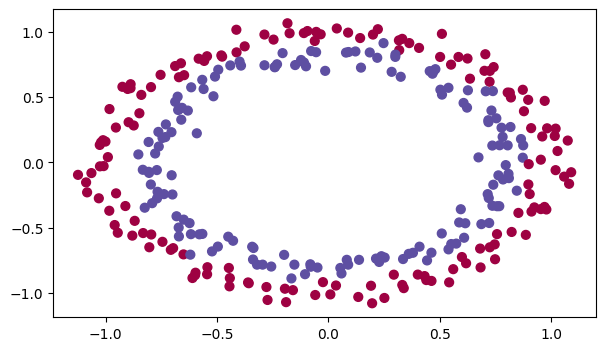

In [3]:
train_X, train_Y, test_X, test_Y = load_dataset()

- *Zeros initialization* --  setting `initialization = "zeros"` in the input argument.
- *Random initialization* -- setting `initialization = "random"` in the input argument. This initializes the weights to large random values.  
- *He initialization* -- setting `initialization = "he"` in the input argument. This initializes the weights to random values scaled according to a paper by He et al., 2015. 


In [6]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]
    
 
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    for i in range(num_iterations):

        a3, cache = forward_propagation(X, parameters)
    
        cost = compute_loss(a3, Y)

        grads = backward_propagation(X, Y, cache)
    
        parameters = update_parameters(parameters, grads, learning_rate)
       
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Zero Initialization

There are two types of parameters to initialize in a neural network:
- the weight matrices $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- the bias vectors $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

<a name='ex-1'></a>
initialize_parameters_zeros

Implement the following function to initialize all parameters to zeros. You'll see later that this does not work well since it fails to "break symmetry," but try it anyway and see what happens. Use `np.zeros((..,..))` with the correct shapes.

In [7]:

def initialize_parameters_zeros(layers_dims):

    parameters = {}
    L = len(layers_dims)          
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
       
    return parameters

In [9]:
parameters = initialize_parameters_zeros([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


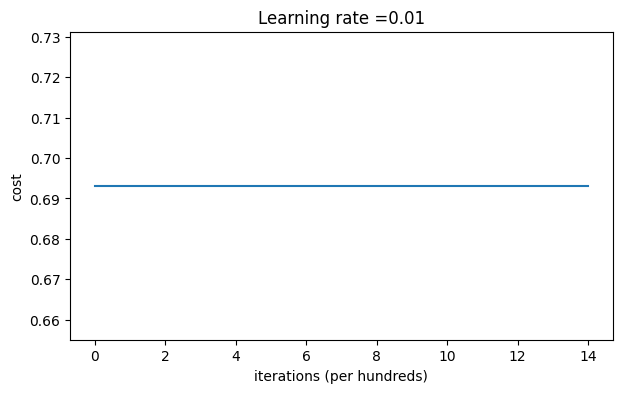

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [11]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The performance is terrible, the cost doesn't decrease, and the algorithm performs no better than random guessing. Why? Take a look at the details of the predictions and the decision boundary:

In [12]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


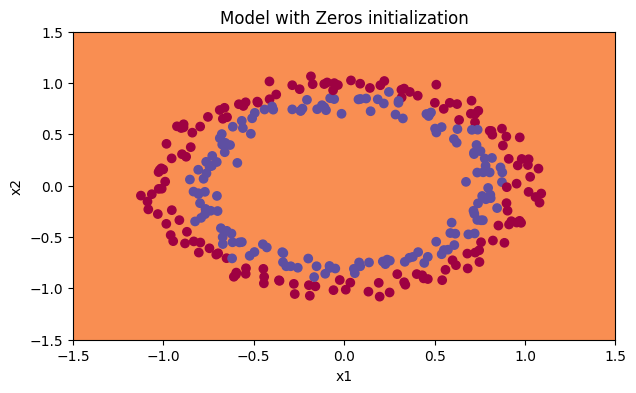

In [13]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

__Note__: For sake of simplicity calculations below are done using only one example at a time.

Since the weights and biases are zero, multiplying by the weights creates the zero vector which gives 0 when the activation function is ReLU. As `z = 0`

$$a = ReLU(z) = max(0, z) = 0$$

At the classification layer, where the activation function is sigmoid you then get (for either input): 

$$\sigma(z) = \frac{1}{ 1 + e^{-(z)}} = \frac{1}{2} = y_{pred}$$

As for every example you are getting a 0.5 chance of it being true our cost function becomes helpless in adjusting the weights.

Your loss function:
$$ \mathcal{L}(a, y) =  - y  \ln(y_{pred}) - (1-y)  \ln(1-y_{pred})$$

For `y=1`, `y_pred=0.5` it becomes:

$$ \mathcal{L}(0, 1) =  - (1)  \ln(\frac{1}{2}) = 0.6931471805599453$$

For `y=0`, `y_pred=0.5` it becomes:

$$ \mathcal{L}(0, 0) =  - (1)  \ln(\frac{1}{2}) = 0.6931471805599453$$

As you can see with the prediction being 0.5 whether the actual (`y`) value is 1 or 0 you get the same loss value for both, so none of the weights get adjusted and you are stuck with the same old value of the weights. 

This is why you can see that the model is predicting 0 for every example! No wonder it's doing so badly.

In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing, so you might as well be training a neural network with $n^{[l]}=1$ for every layer. This way, the network is no more powerful than a linear classifier like logistic regression. 

## Random Initialization



In [14]:

def initialize_parameters_random(layers_dims):

    np.random.seed(3)              
    parameters = {}
    L = len(layers_dims)          
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [15]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


c:\Users\MSI LAPTOP\Desktop\machine learning\DeeplearningSpl_2\Initialization\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
c:\Users\MSI LAPTOP\Desktop\machine learning\DeeplearningSpl_2\Initialization\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6239567039908781
Cost after iteration 2000: 0.5978043872838292
Cost after iteration 3000: 0.563595830364618
Cost after iteration 4000: 0.5500816882570866
Cost after iteration 5000: 0.5443417928662615
Cost after iteration 6000: 0.5373553777823036
Cost after iteration 7000: 0.4700141958024487
Cost after iteration 8000: 0.3976617665785177
Cost after iteration 9000: 0.39344405717719166
Cost after iteration 10000: 0.39201765232720626
Cost after iteration 11000: 0.38910685278803786
Cost after iteration 12000: 0.38612995897697244
Cost after iteration 13000: 0.3849735792031832
Cost after iteration 14000: 0.38275100578285265


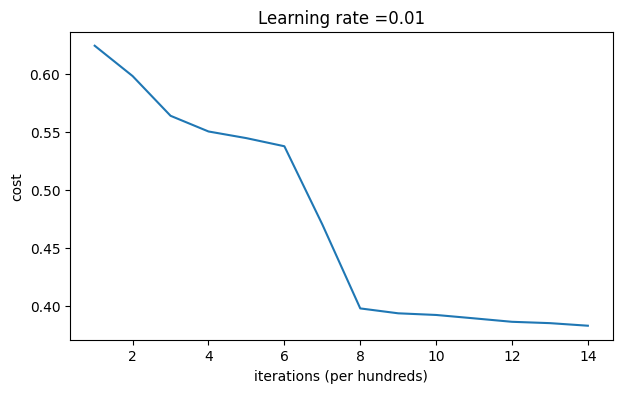

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [16]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [17]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


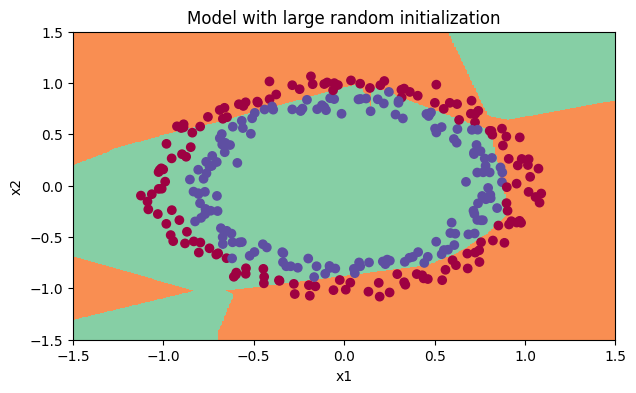

In [18]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observations**:
- The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that are very close to 0 or 1 for some examples, and when it gets that example wrong it incurs a very high loss for that example. Indeed, when $\log(a^{[3]}) = \log(0)$, the loss goes to infinity.
- Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm. 
- If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization.

<font color='blue'>
    
**In summary**:
- Initializing weights to very large random values doesn't work well. 
- Initializing with small random values should do better. The important question is, how small should be these random values be? Let's find out up next!

<font color='green'>    
    
**Optional Read:**


The main difference between Gaussian variable (`numpy.random.randn()`) and uniform random variable is the distribution of the generated random numbers:

- numpy.random.rand() produces numbers in a [uniform distribution](https://raw.githubusercontent.com/jahnog/deeplearning-notes/master/Course2/images/rand.jpg).
- and numpy.random.randn() produces numbers in a [normal distribution](https://raw.githubusercontent.com/jahnog/deeplearning-notes/master/Course2/images/randn.jpg).

When used for weight initialization, randn() helps most the weights to Avoid being close to the extremes, allocating most of them in the center of the range.

An intuitive way to see it is, for example, if you take the [sigmoid() activation function](https://raw.githubusercontent.com/jahnog/deeplearning-notes/master/Course2/images/sigmoid.jpg).

You’ll remember that the slope near 0 or near 1 is extremely small, so the weights near those extremes will converge much more slowly to the solution, and having most of them near the center will speed the convergence.


##  He Initialization

Finally, try "He Initialization"; this is named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` where He initialization would use `sqrt(2./layers_dims[l-1])`.)


In [19]:

def initialize_parameters_he(layers_dims):

    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 
     
    for l in range(1, L + 1):
        parameters['W'+ str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1])*np.sqrt(2/(layers_dims[l-1]))
        parameters['b'+ str(l)] = np.zeros((layers_dims[l], 1))

        
    return parameters

In [20]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071794
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322562
Cost after iteration 9000: 0.18597287209206836
Cost after iteration 10000: 0.15015556280371817
Cost after iteration 11000: 0.12325079292273552
Cost after iteration 12000: 0.09917746546525932
Cost after iteration 13000: 0.08457055954024274
Cost after iteration 14000: 0.07357895962677362


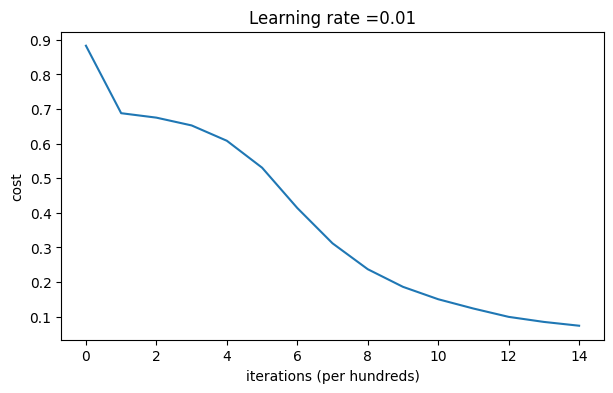

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [21]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

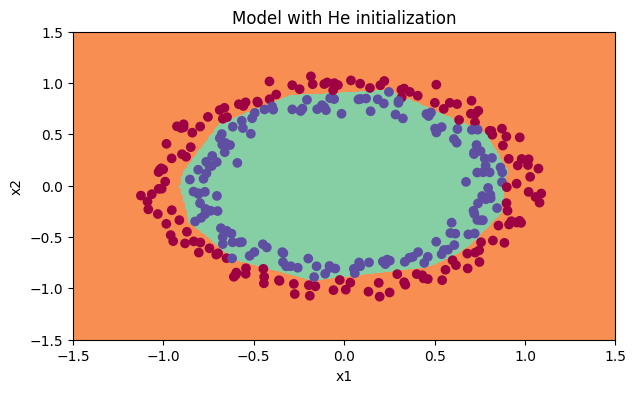

In [22]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<table> 
    <tr>
        <td>
            <b>Model</b>
        </td>
        <td>
            <b>Train accuracy</b>
        </td>
        <td>
            <b>Problem/Comment</b>
        </td>
    </tr>
        <td>
        3-layer NN with zeros initialization
        </td>
        <td>
        50%
        </td>
        <td>
        fails to break symmetry
        </td>
    <tr>
        <td>
        3-layer NN with large random initialization
        </td>
        <td>
        83%
        </td>
        <td>
        too large weights 
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with He initialization
        </td>
        <td>
        99%
        </td>
        <td>
        recommended method
        </td>
    </tr>
</table> 